In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import nltk


In [3]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


# lets take february data (that was the initial stage of corona)(one month data)

In [15]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2020-02-01") \
        .setUntil("2020-02-28") \
        .setMaxTweets(500)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [5]:
from nltk.corpus import stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# use of stop word and tokenization using nltk library

In [7]:
from nltk.tokenize import word_tokenize
import string

import nltk.corpus
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')



In [8]:
nltk.download('punkt')
punct =string.punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
cleaned_text = []
for word in nltk.word_tokenize(text):
    if word not in punct:
        if word not in stop_words:
            cleaned_text.append(word)
    
print ('Original Length  == >', len(text))
print ('length of cleaned text ==>', len(cleaned_text))
print ('\n',cleaned_text )
print (text.lower())


Original Length  == > 83001
length of cleaned text ==> 9168

 ['Pismo', 'Pismo_B', 'This', 'San', 'Francisco', 'Virus', 'called', '‘', 'Pelosi', 'Virus', '’', 'deadly', 'CoronaVirus', '’', 'infecting', 'America', 'last', '35+', 'years', 'This', 'viral', 'virus', 'needs', 'defeated', 'amp', 'thrown', 'Congress', '2020', 'Vote', 'Her', 'Out', 'March', '3', '2020', 'RT', 'w/o', 'Pics', 'Of', 'Pathetic', 'Nancy', 'My', 'time', 'British', 'Quarantine', 'https', '//www.youtube.com/watch', 'v=-Sl9-gZtIco', 'coronavid19', 'coronavirus', 'coronavirusuk', 'quarantine', 'wuhan', 'I', 'would', 'really', 'like', 'opinions', 'health', 'experts', 'If', "'s", 'true', 'coronavirus', 'far', 'worse', 'I', "'ve", 'read', 'far', 'engineered', 'HIV', 'characteristics', 'Truly', 'depressing', 'IF', 'true', 'CoronaVirus', 'TrumpVirus', 'Donorrhea', 'Overall', 'livecrisisnews', 'kept', 'tweet', 'volume', 'fairly', 'low', 'varied', 'topics', '2020', 'briefly', 'got', 'excited', 'Soleimani', 'assassination', 'Ir

In [17]:
text_tweets

[['#Coronavirus #COVID19 It’s going global @TheEconomist https://twitter.com/Finanzas_Times/status/1227034596400881664'],
 ['Pacientes sin seguridad social deberán ser atendidos por hospitales estatales en caso de resultar infectados por #coronavirus; #IMSS e #ISSSTE afirmaron que tienen capacidad de atención en sus sistemas.'],
 ['Three stocks that did well today have "staying at home" in common: Netflix, Peloton, and Zoom (video conferencing). Heads-up! #coronavirus'],
 ['As fears over the #coronavirus outbreak spread, thousands of Americans are clamoring to buy face masks in an effort to protect themselves. But the best way to prevent coronavirus? Wash your hands. '],
 ['PM says #coronavirus is 10x more severe than flu: “this virus is about 10 times more severe than the flu when it comes to its rate of mortality. Now that is significantly less than what SARS and MERS were, but as I said, it moves more quickly” - @ScottMorrisonMP on @AlanJones'],
 ['You’re daddy has a real (not manuf

In [18]:
cleaned_text

['Pismo',
 'Pismo_B',
 'This',
 'San',
 'Francisco',
 'Virus',
 'called',
 '‘',
 'Pelosi',
 'Virus',
 '’',
 'deadly',
 'CoronaVirus',
 '’',
 'infecting',
 'America',
 'last',
 '35+',
 'years',
 'This',
 'viral',
 'virus',
 'needs',
 'defeated',
 'amp',
 'thrown',
 'Congress',
 '2020',
 'Vote',
 'Her',
 'Out',
 'March',
 '3',
 '2020',
 'RT',
 'w/o',
 'Pics',
 'Of',
 'Pathetic',
 'Nancy',
 'My',
 'time',
 'British',
 'Quarantine',
 'https',
 '//www.youtube.com/watch',
 'v=-Sl9-gZtIco',
 'coronavid19',
 'coronavirus',
 'coronavirusuk',
 'quarantine',
 'wuhan',
 'I',
 'would',
 'really',
 'like',
 'opinions',
 'health',
 'experts',
 'If',
 "'s",
 'true',
 'coronavirus',
 'far',
 'worse',
 'I',
 "'ve",
 'read',
 'far',
 'engineered',
 'HIV',
 'characteristics',
 'Truly',
 'depressing',
 'IF',
 'true',
 'CoronaVirus',
 'TrumpVirus',
 'Donorrhea',
 'Overall',
 'livecrisisnews',
 'kept',
 'tweet',
 'volume',
 'fairly',
 'low',
 'varied',
 'topics',
 '2020',
 'briefly',
 'got',
 'excited',
 'So

In [19]:
final_words = cleaned_text

In [20]:
emotion_list = []
with open('emotions.neww.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)


Counter({' fearful': 4, ' powerless': 3, ' fearless': 2, ' attracted': 2, ' happy': 2, ' sad': 2, ' surprise': 2, ' adequate': 2, ' safe': 1, ' average': 1, ' apathetic': 1, ' free': 1, ' entitled': 1, ' attached': 1, ' hated': 1, ' angry': 1, ' loved': 1, ' esteemed': 1, ' anxious': 1, ' belittled': 1})


In [ ]:
#we can observe people are fearful powerless but at the same time some are fearless 
#some are surprised,some are belitlled(that is unimportant)
#so we can clearly see there is an average response because people are feeling loved,happy,safe 
#showing there is no such  bigger impact of corona among mass in february

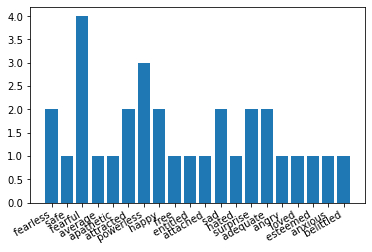

In [21]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# now lets consider data from june to july when cases increased rapidly

In [ ]:
#in this case i will also update my emotion list so as to understand the responses in a better way

In [42]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#covid19pandemic') \
        .setSince("2020-06-20") \
        .setUntil("2020-07-20") \
        .setMaxTweets(500)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [43]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
cleaned_text = []
for word in nltk.word_tokenize(text):
    if word not in punct:
        if word not in stop_words:
            cleaned_text.append(word)
    
print ('Original Length  == >', len(text))
print ('length of cleaned text ==>', len(cleaned_text))
print ('\n',cleaned_text )
print (text.lower())


Original Length  == > 97284
length of cleaned text ==> 9697

 ['Actually', 'deaths', 'underreported', 'globally', 'COVID19Pandemic', 'Median', 'apartment', 'rents', 'SiliconValley', 'amp', 'SanFrancisco', 'soften', 'right', 'remotework', 'amp', 'remotejobs', 'stop', 'gap', 'COVID19Pandemic', 'https', '//fxn.ws/3hgo5ih', 'FoxBusiness', 'Waah', 'What', 'novel', 'way', 'fight', 'Covid19Pandemic', 'Stop', 'rambling', 'GovRonDeSantis', 'inform', 'Florida', 'going', 'DO', 'rising', 'COVID19', 'cases', 'What', 'plan', 'COVID19Pandemic', 'FloridaCovidEpicenter', 'Make', 'sure', 'see', 'full', 'image', 'Excellent', 'response', 'one', 'week', "'s", 'impossible', '``', 'ca', "n't", 'make', 'stuff', "''", 'sentences', 'Trump', "'s", 'Press', 'Sec', 'COVID19Pandemic', 'driver', "'s", 'seat', 'Protect', 'PublicSchools', 'How', 'many', 'uninstalled', 'cab', 'hailing', 'apps', 'like', 'Uber', 'Ola', 'I', 'mean', 'I', "n't", 'gone', 'anywhere', 'since', 'March', 'really', 'suddenly', 'hit', '``', 'I', 

In [44]:
cleaned_text

['Actually',
 'deaths',
 'underreported',
 'globally',
 'COVID19Pandemic',
 'Median',
 'apartment',
 'rents',
 'SiliconValley',
 'amp',
 'SanFrancisco',
 'soften',
 'right',
 'remotework',
 'amp',
 'remotejobs',
 'stop',
 'gap',
 'COVID19Pandemic',
 'https',
 '//fxn.ws/3hgo5ih',
 'FoxBusiness',
 'Waah',
 'What',
 'novel',
 'way',
 'fight',
 'Covid19Pandemic',
 'Stop',
 'rambling',
 'GovRonDeSantis',
 'inform',
 'Florida',
 'going',
 'DO',
 'rising',
 'COVID19',
 'cases',
 'What',
 'plan',
 'COVID19Pandemic',
 'FloridaCovidEpicenter',
 'Make',
 'sure',
 'see',
 'full',
 'image',
 'Excellent',
 'response',
 'one',
 'week',
 "'s",
 'impossible',
 '``',
 'ca',
 "n't",
 'make',
 'stuff',
 "''",
 'sentences',
 'Trump',
 "'s",
 'Press',
 'Sec',
 'COVID19Pandemic',
 'driver',
 "'s",
 'seat',
 'Protect',
 'PublicSchools',
 'How',
 'many',
 'uninstalled',
 'cab',
 'hailing',
 'apps',
 'like',
 'Uber',
 'Ola',
 'I',
 'mean',
 'I',
 "n't",
 'gone',
 'anywhere',
 'since',
 'March',
 'really',
 'sud

In [45]:
final_words = cleaned_text
emotion_list = []
#creating a new emotion list with some modifications according to my data
with open('emotion.finall.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)


Counter({' sad': 7, ' powerless': 4, ' angry': 3, ' fearful': 3, ' fearless': 2, ' average': 2, ' bored': 1, ' surprise': 1, ' demoralized': 1, ' anxious': 1, ' free': 1, ' hated': 1, ' affected': 1, ' attracted': 1, ' apathetic': 1, ' lost': 1, ' adequate': 1, ' alone': 1, ' happy': 1, ' esteemed': 1})


In [ ]:
#now we can see majority people are feeling sad, powerless,angry,fearful
#at the same time there are few which are happy fearless 
#but that's in a less proprtion also people are feeling bored hated demoralised lost ,
#we can observe from earlier impact is stronger more people are sad more people are feeling powerless,
#but also people are getting used to it so feelings of surprise is now less.

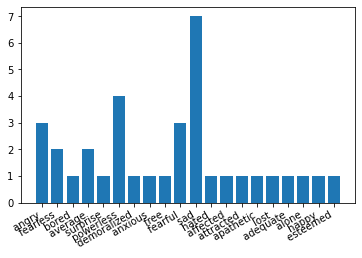

In [46]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# lets take two documents doc_a and doc_b (few lines choosen from above data (twitter))(bag of words using count vectorizer)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer 

from nltk.corpus import stopwords
import pandas as pd

# Single document (',' seperates each document)
doc_a = ["during this global pandemic,one of the most important ways to prevent the spread of coronavirus is to wash your hands frequently with soap and water and wear a mask when you step outside.Together we all can fight against covid19"]

# This step will convert text into tokens 
vect1 = CountVectorizer()

vect1.fit_transform(doc_a)
print("bag of words :",vect1.get_feature_names())

bag of words : ['against', 'all', 'and', 'can', 'coronavirus', 'covid19', 'during', 'fight', 'frequently', 'global', 'hands', 'important', 'is', 'mask', 'most', 'of', 'one', 'outside', 'pandemic', 'prevent', 'soap', 'spread', 'step', 'the', 'this', 'to', 'together', 'wash', 'water', 'ways', 'we', 'wear', 'when', 'with', 'you', 'your']


In [58]:
vect1.vocabulary_

{'during': 6,
 'this': 24,
 'global': 9,
 'pandemic': 18,
 'one': 16,
 'of': 15,
 'the': 23,
 'most': 14,
 'important': 11,
 'ways': 29,
 'to': 25,
 'prevent': 19,
 'spread': 21,
 'coronavirus': 4,
 'is': 12,
 'wash': 27,
 'your': 35,
 'hands': 10,
 'frequently': 8,
 'with': 33,
 'soap': 20,
 'and': 2,
 'water': 28,
 'wear': 31,
 'mask': 13,
 'when': 32,
 'you': 34,
 'step': 22,
 'outside': 17,
 'together': 26,
 'we': 30,
 'all': 1,
 'can': 3,
 'fight': 7,
 'against': 0,
 'covid19': 5}

In [59]:
count_vect = CountVectorizer()

count_vect.fit(doc_a)

CountVectorizer()

In [60]:
doc_b = ['I guess the biggest success we have this week,is finally putting all our cover safety measures together for unseen tours in tough times like covid19,so that we can start preparing for safe and enjoyable events in london safety first!The safety of our employees,customers and suppliers are our top priority.Face mask,hand washing,disinfecting,social distancing.We are in this together']

count_new_vect = count_vect.transform(doc_b)

print ("Text Present at ",count_new_vect.toarray())

# Compare with the indexes
print ("original indexes", vect1.get_feature_names() )
#we can see presence of words from doc_b in bag of words of doc_a 
#such as "we" is present 3 times,
#"all" is present is 1 time,"and" is present 3 times,
#"together" is present 2 times,"is" present 1 time,"mask" present 1 time,"covid19" present 1 time,
#"this" present 2 times,"together" present 2 times,"the" present 2 times,"of" present 1 time
#11 words present from doc_b in bog of words of doc_a

Text Present at  [[0 1 2 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 2 2 0 2 0 0 0 3 0 0 0 0 0]]
original indexes ['against', 'all', 'and', 'can', 'coronavirus', 'covid19', 'during', 'fight', 'frequently', 'global', 'hands', 'important', 'is', 'mask', 'most', 'of', 'one', 'outside', 'pandemic', 'prevent', 'soap', 'spread', 'step', 'the', 'this', 'to', 'together', 'wash', 'water', 'ways', 'we', 'wear', 'when', 'with', 'you', 'your']
